# #Fingerprints LT4

In [5]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 5, 10

import sys
import os
import numpy as np
sys.path.append(r'D:/measuring')
sys.path.append(r'D:/measuring/analysis')
sys.path.append(r'D:/measuring/analysis/scripts/purification/')

import fp_analysis_load_separate as fp_ls;
reload(fp_ls)
%matplotlib inline  

In [6]:
# loading data
#Combined script, N = [8,16,32,64]
import fp_analysis_load_separate as fp_ls; reload(fp_ls)
listN = [8,16,32,64]

a_list_min, folder_list_min = fp_ls.load_data(N= listN, el_trans = 'min')
print folder_list_min
# a_list_plus, folder_list_plus = fp_ls.load_data(N= listN, el_trans = 'plus') ### 
# print folder_list_plus
print 'Loading complete'


loading data
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement0" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement1" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement2" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement3" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement4" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement5" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement6" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement7" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement8" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement9" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement10" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement11" (7 members)>
<HDF5 group "/Hermite_Fingerprint_msm1_111no2_8/measurement12" (7 members)>
<HDF5 gro

HF_perp = []
HF_par = []
N = [8, 16, 32, 64]
['N8', 'N16', 'N32', 'N64']
these are the sweep_pts [  3.5          3.50392234   3.50784468 ...,  23.49215532  23.49607766
  23.5       ]
Starting Simulation for N = 8 on transition min
417.05
omega_larmor = 2805140.80384
in SC B_field = 417.05
in SC HF_par = []
in SC HF_perp = []
d:\measuring\data\20160420\183630_DecouplingSequence_Hermite_Fingerprint_msm1_111no2_8
these are the sweep_pts [  3.5          3.50392234   3.50784468 ...,  23.49215532  23.49607766
  23.5       ]
Starting Simulation for N = 16 on transition min
417.05
omega_larmor = 2805140.80384
in SC B_field = 417.05
in SC HF_par = []
in SC HF_perp = []
d:\measuring\data\20160420\200748_DecouplingSequence_Hermite_Fingerprint_msm1_111no2_16
these are the sweep_pts [  3.5          3.50392234   3.50784468 ...,  23.49215532  23.49607766
  23.5       ]
Starting Simulation for N = 32 on transition min
417.05
omega_larmor = 2805140.80384
in SC B_field = 417.05
in SC HF_par = []
in SC H

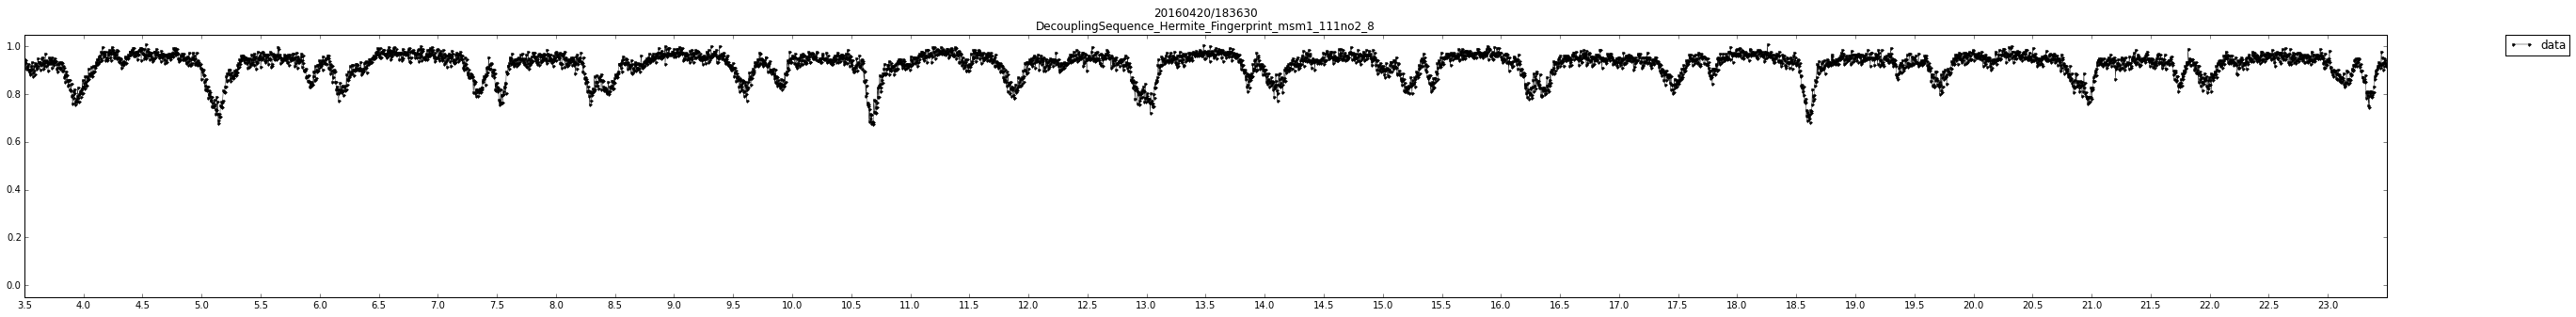

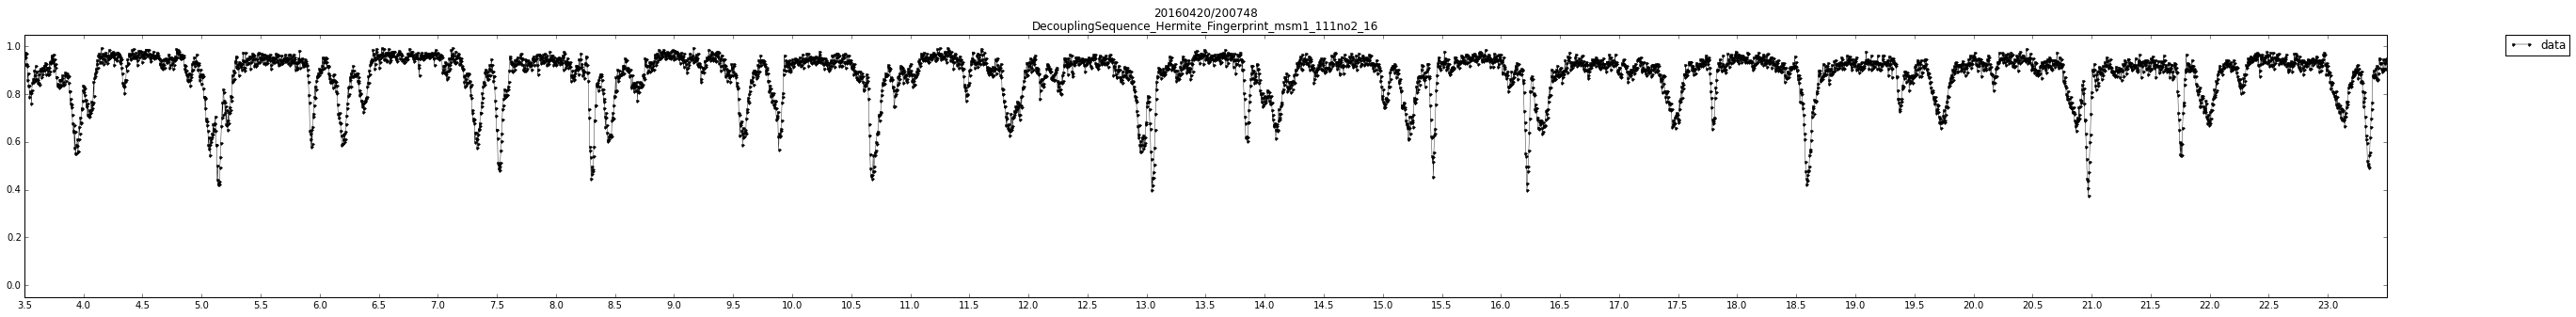

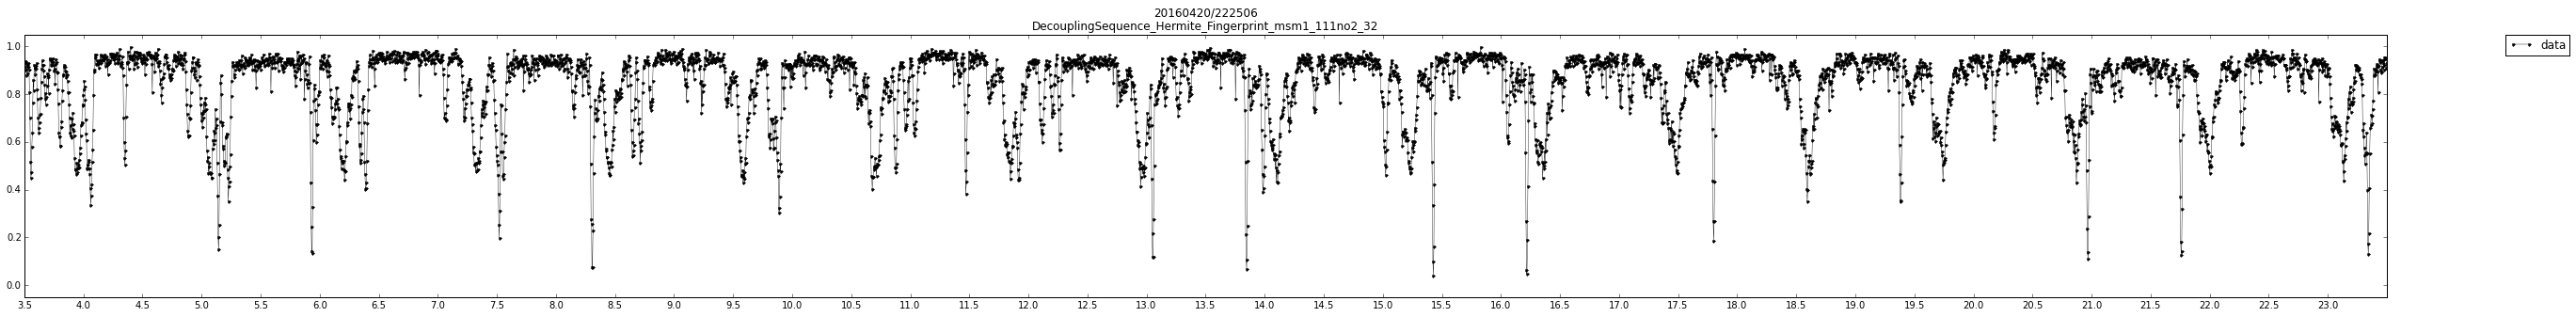

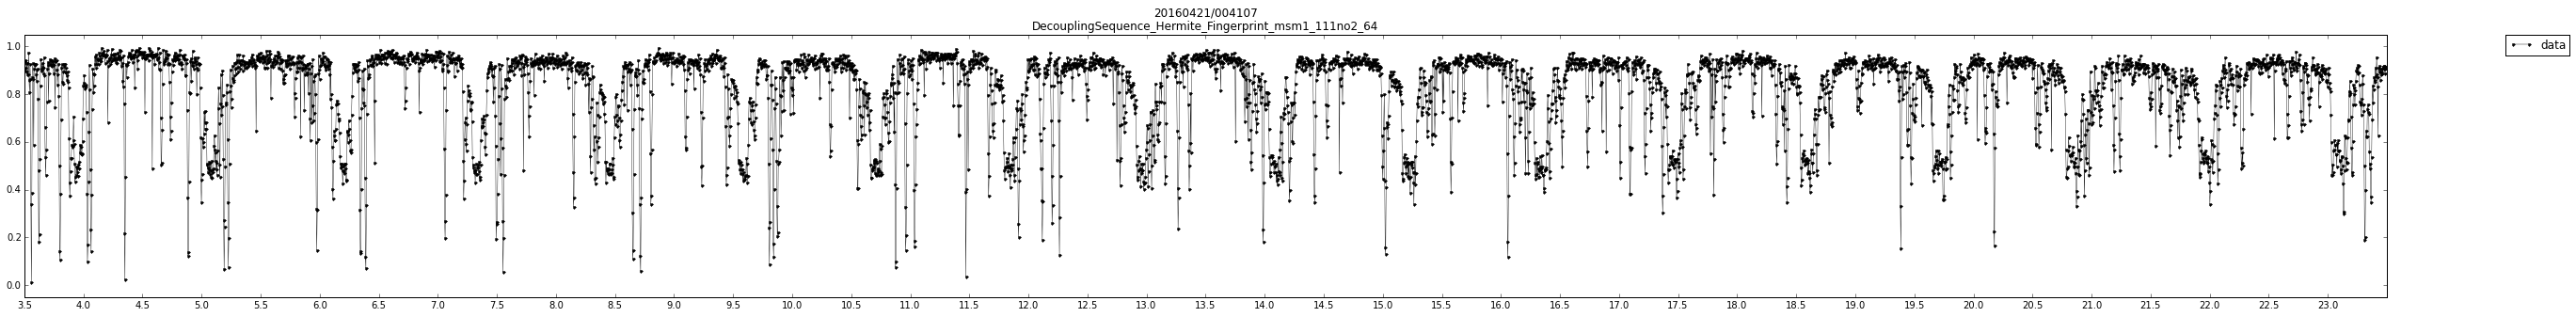

In [7]:
#plot the ms=-1 fp
reload(fp_ls)
fp_ls.fingerprint(a = a_list_min, folder = folder_list_min, disp_sim_spin = True, N = listN,
                   el_trans = 'min', HF_perp = [], HF_par = [] , xlim = [3.5,23.5])


[8, 16, 32, 64]
HF_perp = [100000.0, 25000.0, 30000.0, 18000.0, 30000.0, 35000.0]
HF_par = [365000.0, 55000.0, -26500.0, 26000.0, 72000.0, -33000.0]
N = [32]
['N32']
these are the sweep_pts [  3.5          3.50392234   3.50784468 ...,  23.49215532  23.49607766
  23.5       ]
Starting Simulation for N = 32 on transition min
417.05
omega_larmor = 2805140.80384
in SC B_field = 417.05
in SC HF_par = [365000.0, 55000.0, -26500.0, 26000.0, 72000.0, -33000.0]
in SC HF_perp = [100000.0, 25000.0, 30000.0, 18000.0, 30000.0, 35000.0]
d:\measuring\data\20160420\222506_DecouplingSequence_Hermite_Fingerprint_msm1_111no2_32


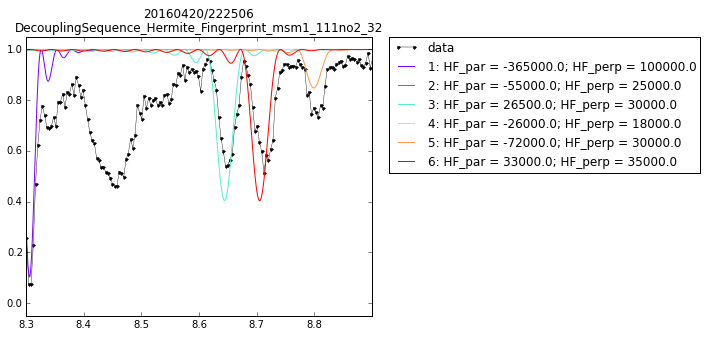

In [21]:
#Plot single fingerprint (index takes the entry from the data array)
reload(fp_ls)

index = 2
keys = ['N8','N16','N32','N64']
print listN
hf_par  = [-365e3,-55e3,26.5e3,-26e3,-72e3,33e3]#[53e3,45e3,-7e3] 
hf_perp = [100e3,25e3,30e3,18e3,30e3,35e3]#[50e3,25e3,17.5e3]
fp_ls.fingerprint(a = a_list_min, folder = folder_list_min, disp_sim_spin = True, N = [listN[index]],
                   el_trans = 'min', xlim=[8.3,8.9],xticks=0.1, HF_par = hf_par, HF_perp = hf_perp)
# index = 3
# fp_ls.fingerprint(a = [a_list_min[index]], folder = [folder_list_min[index]], disp_sim_spin = True, N = [64],
#                    el_trans = 'min', xlim=[3.5,23.5],xticks=0.5, HF_par = hf_par, HF_perp = hf_perp)

In [126]:
f_l = 446.6e3
k = 4
tau_k = 4.3e-6
A_par = (k-0.5)/tau_k - 2*f_l
print A_par

-79246.5116279


In [101]:
gamma_c = 6.728287e7
gam_correct = gamma_c*1e-4/(2*np.pi)
f_l = 446.6e3
print gam_correct
B_field = f_l/gam_correct 
print B_field

1070.84013459
417.055716884


d:\measuring\data\20160309\163933_AdwinSSRO_SSROCalibration_111no2_SIL2
HF_perp = []
HF_par = []
N = [8, 16, 32, 64]
these are the sweep_pts [  3.5          3.50392234   3.50784468 ...,  23.49215532  23.49607766
  23.5       ]
Starting Simulation for N = 8 on transition plus
417.05
omega_larmor = 2805140.80384
d:\measuring\data\20160309\173550_DecouplingSequence_Hermite_Fingerprint_msp1_111no2_8
these are the sweep_pts [  3.5          3.50392234   3.50784468 ...,  23.49215532  23.49607766
  23.5       ]
Starting Simulation for N = 16 on transition plus
417.05
omega_larmor = 2805140.80384
d:\measuring\data\20160309\193753_DecouplingSequence_Hermite_Fingerprint_msp1_111no2_16
these are the sweep_pts [  3.5          3.50392234   3.50784468 ...,  23.49215532  23.49607766
  23.5       ]
Starting Simulation for N = 32 on transition plus
417.05
omega_larmor = 2805140.80384
d:\measuring\data\20160309\220938_DecouplingSequence_Hermite_Fingerprint_msp1_111no2_32
these are the sweep_pts [  3.5   

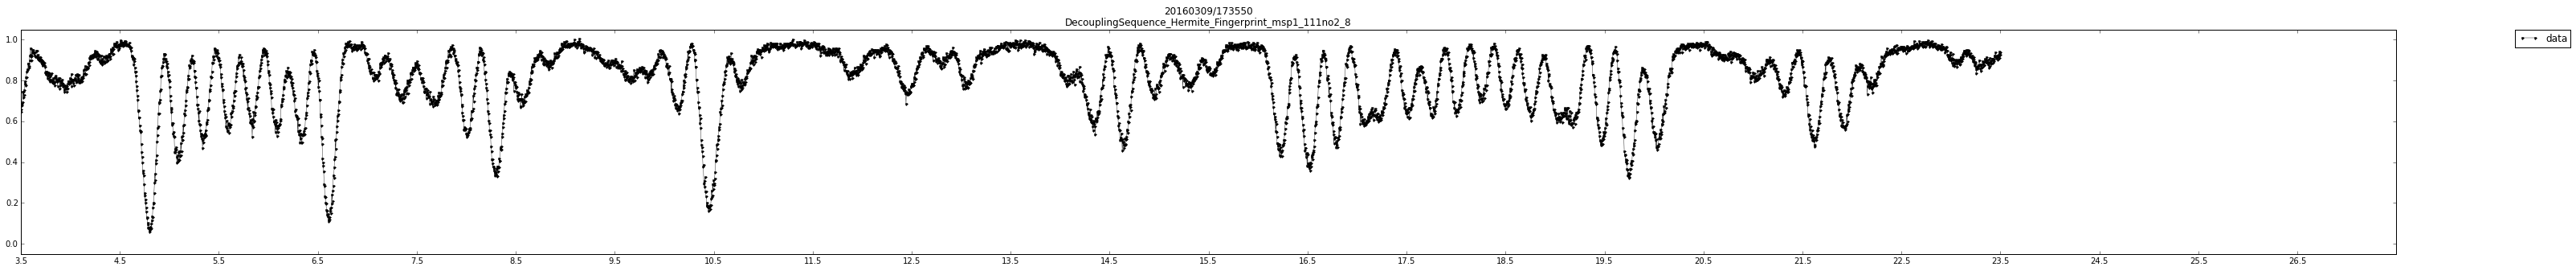

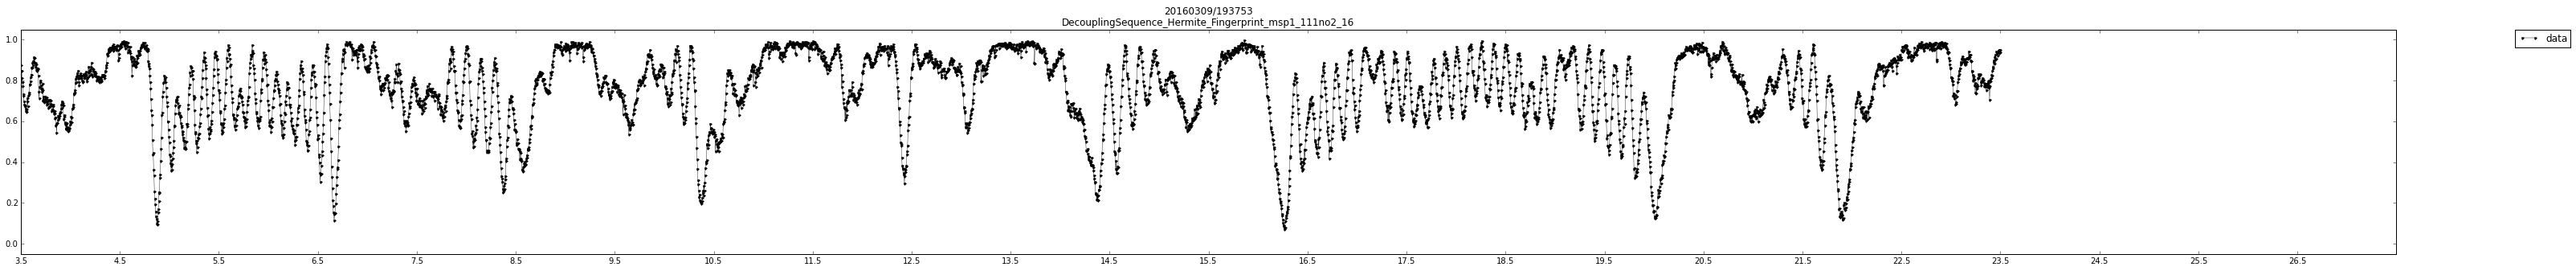

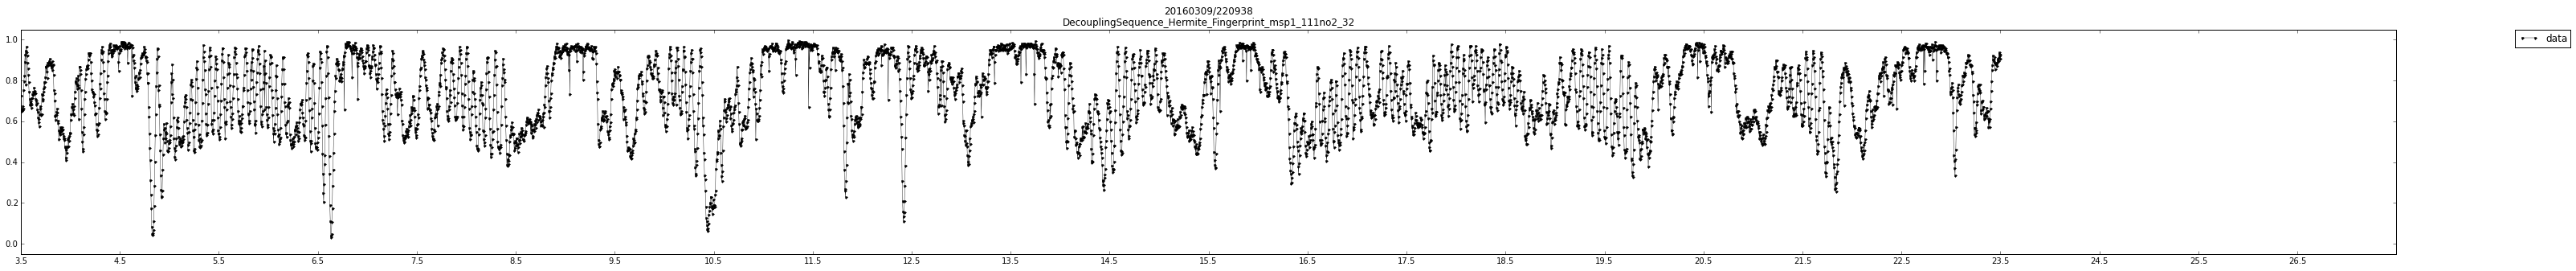

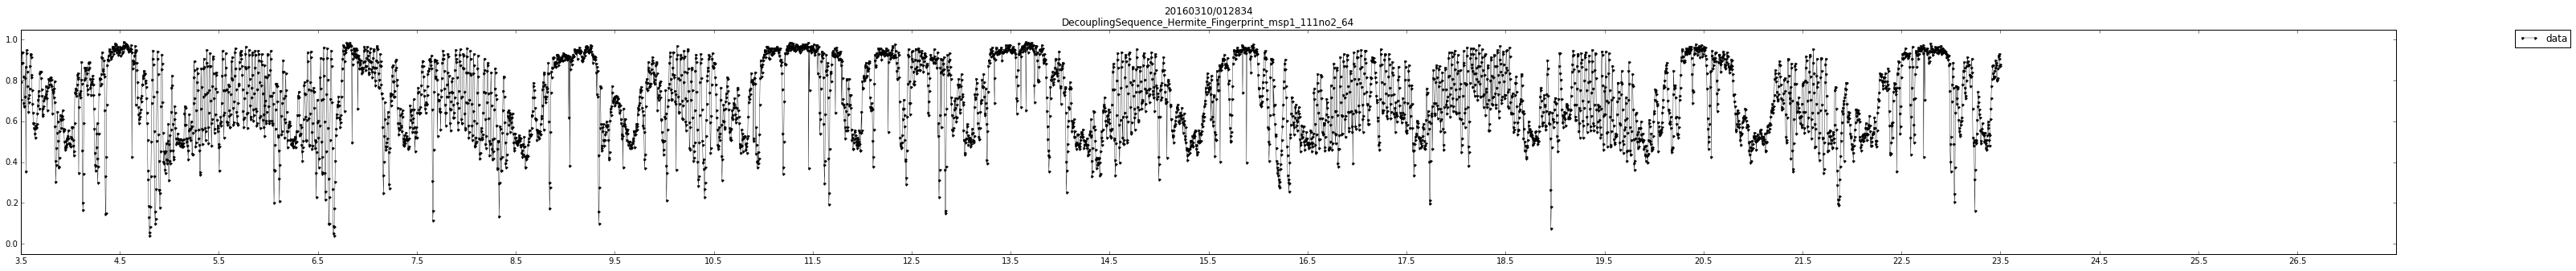

In [28]:
# Plot plus\

# hyperfine_params_pippin_SIL1_msm1 = {}
# hyperfine_params_pippin_SIL1_msm1['C1']  = {'par' : -335e3 , 'perp':312.5e3}
# hyperfine_params_pippin_SIL1_msm1['C2']  = {'par' : -90e3  , 'perp':122.5e3} 
# hyperfine_params_pippin_SIL1_msm1['C3']  = {'par' : -92.5e3, 'perp':68.8e3}  
# hyperfine_params_pippin_SIL1_msm1['C4']  = {'par' : 22e3,    'perp':25e3}
# hyperfine_params_pippin_SIL1_msm1['C5']  = {'par' : -18e3,   'perp':30e3}
# hyperfine_params_pippin_SIL1_msm1['C6']  = {'par' : -6.3e3,  'perp':27.5e3}
# hyperfine_params_pippin_SIL1_msm1['C7']  = {'par' : 27.5e3,  'perp':27e3}
# hyperfine_params_pippin_SIL1_msm1['C8']  = {'par' : -36.5e3, 'perp':44e3}


hf_par = [-335e3, -18e3, -6.3e3] #+ np.linspace(-6e3,-6.2e3,2).tolist()
hf_perp = [290e3, 30e3, 25e3] #+ np.linspace(20e3, 25e3,2).tolist()
reload(fp_ls)
fp_ls.fingerprint(a = a_list_plus, folder = folder_list_plus, disp_sim_spin = True, N = [8,16,32,64],
                   el_trans = 'plus', xlim=[3.5,27.5] ,xticks=1, HF_par = [],HF_perp = [])

d:\measuring\data\20160310\105957_AdwinSSRO_SSROCalibration_111no2_SIL2
HF_perp = [350000.0, 325000.0, 300000.0]
HF_par = [-400000.0, -400000.0, -400000.0]
N = [8]
these are the sweep_pts [  3.5          3.50392234   3.50784468 ...,  23.49215532  23.49607766
  23.5       ]
Starting Simulation for N = 8 on transition plus
417.05
omega_larmor = 2805140.80384
d:\measuring\data\20160309\173550_DecouplingSequence_Hermite_Fingerprint_msp1_111no2_8


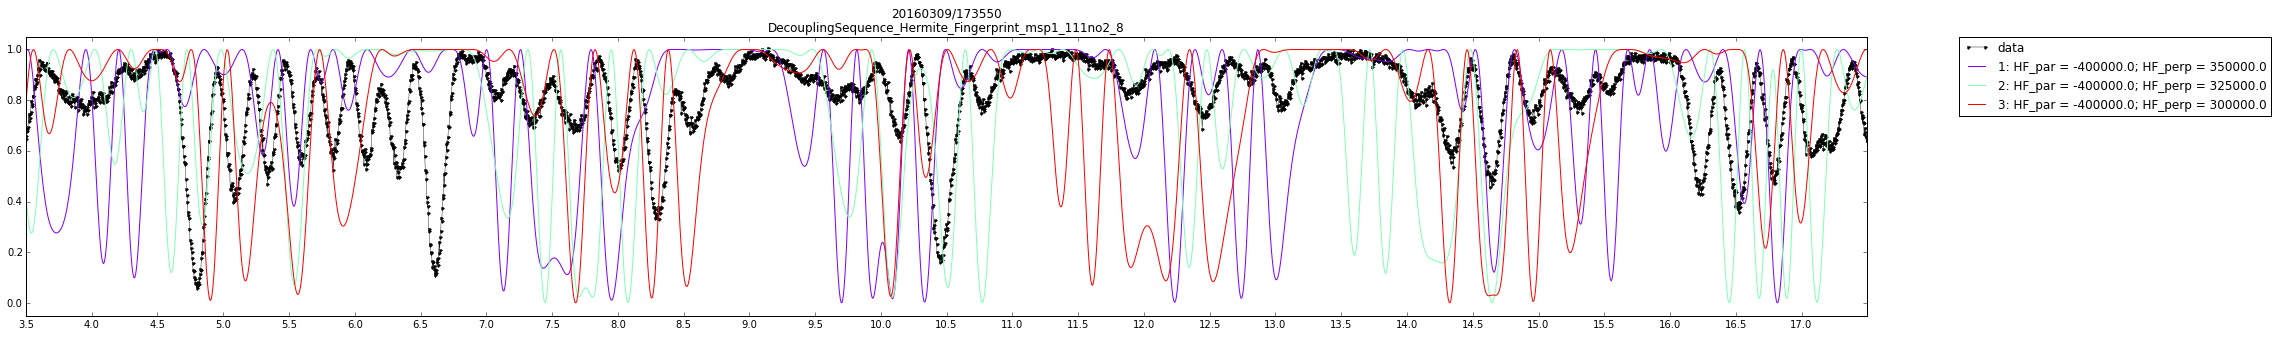

In [55]:
# only one
hf_par =  np.linspace(-400e3,-400e3,3).tolist()
hf_perp =  np.linspace(350e3, 300e3,3).tolist()
reload(fp_ls)
index = 0
Nlist = [8,16,32,64]
fp_ls.fingerprint(a = [a_list_plus[index]], folder = [folder_list_plus[index]], disp_sim_spin = True, N = [Nlist[index]],
                   el_trans = 'plus', xlim=[3.5,17.5] ,xticks=0.5, HF_par = hf_par,HF_perp = hf_perp)
fp_ls.fingerprint(a = [a_list_plus[index]], folder = [folder_list_plus[index]], disp_sim_spin = True, N = [Nlist[index]],
                   el_trans = 'plus', xlim=[3.5,17.5] ,xticks=0.5, HF_par = hf_par,HF_perp = hf_perp)